In [104]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

In [105]:
dtype = torch.FloatTensor
input_size = 7
hidden_size = 6
output_size = 1
epochs = 300
seq_length = 20
lr = 0.1

In [106]:
data_time_steps = np.linspace(2,10,seq_length + 1)

In [107]:
data_time_steps

array([ 2. ,  2.4,  2.8,  3.2,  3.6,  4. ,  4.4,  4.8,  5.2,  5.6,  6. ,
        6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ])

In [108]:
data = np.sin(data_time_steps)

In [109]:
data.resize(seq_length + 1, 1)

In [110]:
x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

In [111]:
w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
init.normal_(w1, 0.0, std=0.4)
w1 = Variable(w1, requires_grad=True)

w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal_(w2, 0.0, std=0.4)
w2 = Variable(w2, requires_grad=True)

In [112]:
def forward(input, context_state, w1, w2):
    xh = torch.cat((input, context_state), 1)
    context_state = torch.tanh(xh.mm(w1))
    out = context_state.mm(w2)
    return (out, context_state)

In [113]:
for i in range(epochs):
    total_loss = 0
    context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=True)
    for j in range(x.size(0)):
        input = x[j:(j+1)]
        target = y[j:(j+1)]
        (pred, context_state) =forward(input, context_state, w1, w2)
        loss = (pred - target).pow(2).sum()/2
        total_loss += loss
        loss.backward()
        w1.data -= lr * w1.grad.data
        w2.data -= lr * w2.grad.data
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        context_state = Variable(context_state.data)
    if i % 100 == 0:
        print("Epoch: {} loss {}".format(i, total_loss.data[0]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 0 loss 2.1267945766448975
Epoch: 100 loss 0.22828777134418488
Epoch: 200 loss 0.12456347048282623


In [114]:
context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=False)
predictions = []

for i in range(x.size(0)):
    input = x[i:i+1]
    forward(input, context_state, w1, w2)
    context_state = context_state
    predictions.append(pred.data.numpy().ravel())

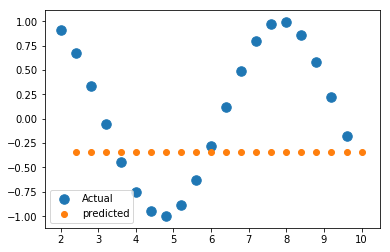

In [115]:
pl.scatter(data_time_steps[:-1], x.data.numpy(), s=90, label="Actual")
pl.scatter(data_time_steps[1:], predictions, label="predicted")
pl.legend()
pl.show()